In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [15]:
df= pd.read_csv(r"C:\Users\Almodather\Downloads\archive_6\Mall_Customers.csv")

# Explore Data

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 2- Transform object Data

In [8]:
la= LabelEncoder()

In [9]:
object= df.select_dtypes("object")

In [23]:
df["Gender"]=la.fit_transform(object)

c:\Users\Almodather\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# 3- Create Model

In [29]:
#la=StandardScaler()

In [30]:
#xdata=la.fit_transform(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])

In [36]:
cluster=[]
intertia=[]

In [37]:
for i in range (1,12):
    model=KMeans(n_clusters=i)
    model.fit(df)
    cluster.append(i)
    intertia.append(model.inertia_)


In [40]:
pd.DataFrame(cluster,intertia)

,0
975512.060000,1
387065.713771,2
271765.809743,3
195401.198560,4
157620.971480,5
122751.823661,6
105756.556476,7
95038.751391,8
92814.493997,9
69875.991376,10


Text(0, 0.5, 'perc of Error ')

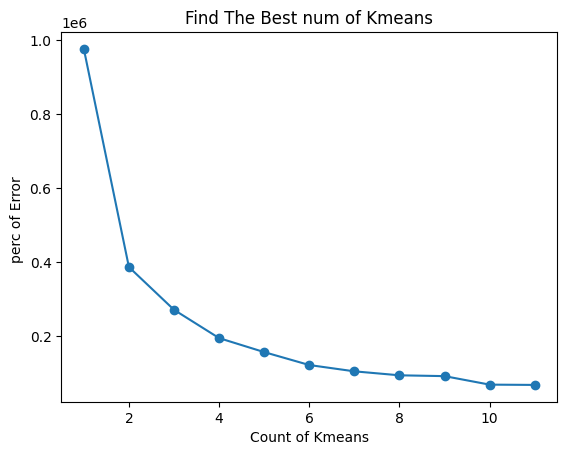

In [46]:
plt.plot(cluster,intertia,marker="o")
plt.title("Find The Best num of Kmeans")
plt.xlabel("Count of Kmeans")
plt.ylabel("perc of Error ")

In [47]:
model=KMeans(n_clusters=4)
model.fit(df)
pre=model.predict(df)

In [48]:
df["KMeans"]=pre

In [49]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [50]:
df1=df[df["KMeans"]==0]
df2=df[df["KMeans"]==1]
df3=df[df["KMeans"]==2]
df4=df[df["KMeans"]==3]

In [51]:
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
56,57,0,51,44,50,0
57,58,1,69,44,46,0
58,59,0,27,46,51,0
59,60,1,53,46,46,0


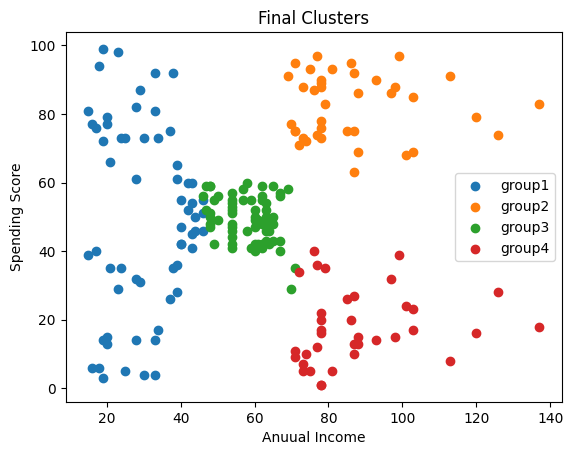

In [66]:
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],label="group1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],label="group2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],label="group3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],label="group4")
plt.title("Final Clusters")
plt.xlabel("Anuual Income")
plt.ylabel("Spending Score")
plt.legend()

# Data Analysis

In [67]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


<Axes: xlabel='KMeans', ylabel='count'>

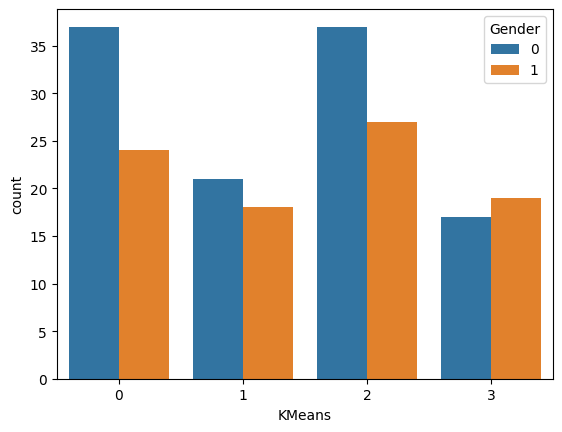

In [90]:
sns.countplot(x='KMeans', hue='Gender', data=df)


<Axes: ylabel='count'>

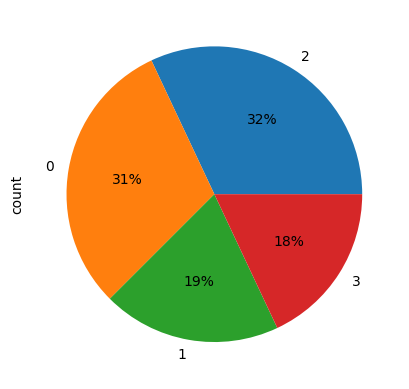

In [79]:
df["KMeans"].value_counts().plot.pie(autopct="%0.f%%")

In [80]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

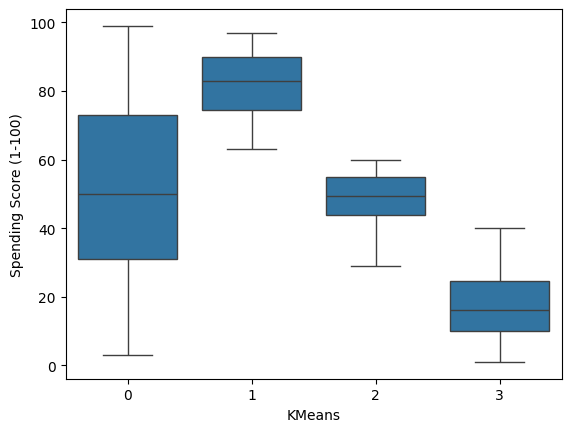

In [87]:
sns.boxplot(x="KMeans",y="Spending Score (1-100)",data=df)

<Axes: xlabel='Age', ylabel='Count'>

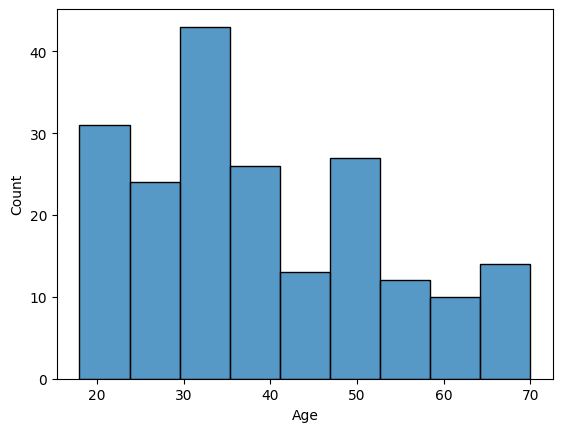

In [88]:
sns.histplot(df.Age)